<a href="https://colab.research.google.com/github/samuelhuss/API-Devs/blob/main/TechChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge - Medical Costs Predict**
**Integrantes**: Samuel, Andre e Maycon





## **1. Introdução**
Nesta seção, descrevemos o problema que estamos tentando resolver. O objetivo é desenvolver um modelo preditivo de regressão para prever o valor os custos médicos individuais cobrados pelo seguro de saúde com base em informações fornecidas, como idade, sexo, IMC, número de filhos, tabagismo e região.




## **2. Carregamento e Exploração dos Dados**
Nesta etapa, importamos as bibliotecas, os dados são carregados e uma análise exploratória dos mesmos é realizada para entender melhor suas características.

**Descrição dos dados:**
* `age`: *Idade do paciente*
* `sex`: *Sexo*
* `bmi`: *Índice de Massa Corporal*
* `children`: *Número de filhos*
* `smoker`: *Se o paciente é fumante*
* `region`: *Região de residência*
* `charges`: *Custos médicos*




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

In [ ]:
sns.set_style('ticks')
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
df = pd.read_excel('/content/medical_costs.xlsx')

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,medical_cost
0,58,male,156,2,yes,northwest,1790754
1,24,male,298,0,yes,northeast,1631264
2,50,male,290,5,no,northwest,681921
3,35,male,340,1,no,southeast,524787
4,31,female,176,3,yes,southeast,1752549


In [ ]:
df.describe()

,age,bmi,children,medical_cost
count,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,41.678400,274.030100,2.501700,1.086267e+06
std,13.807724,72.289601,1.701672,6.573531e+05
min,18.000000,150.000000,0.000000,3.653500e+04
25%,30.000000,211.000000,1.000000,5.507455e+05
50%,42.000000,274.000000,2.000000,6.977250e+05
75%,54.000000,337.000000,4.000000,1.780741e+06
max,65.000000,400.000000,5.000000,2.026821e+06


In [47]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
medical_cost,0


In [ ]:
fig = px.histogram(df, x='age', marginal='box', nbins=47, title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [ ]:
fig = px.scatter(df, x='age', y='medical_cost', title='Age vs Medical Cost')
fig.show()

In [49]:
fig = px.scatter(df, x='smoker', y='medical_cost', title='Smoker vs Medical Cost')
fig.show()

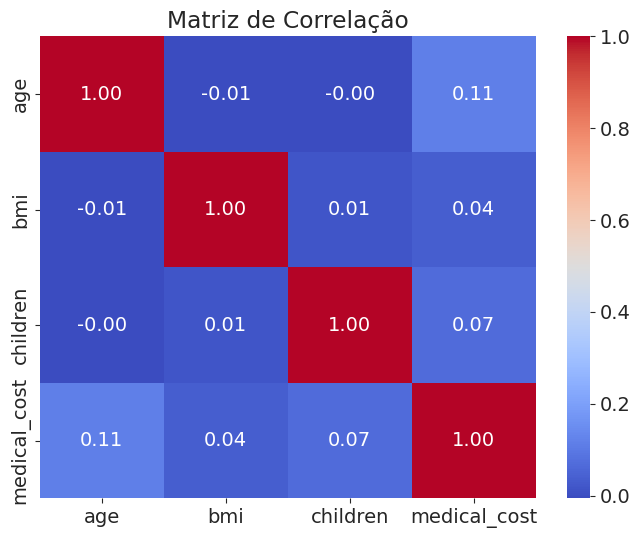

In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

## **3. Pré-processamento dos Dados**
Nesta etapa, o foco é preparar os dados para que possam ser utilizados no modelo. Isso pode incluir a transformação de variáveis categóricas, tratamento de valores ausentes, e normalização de variáveis numéricas.

In [ ]:
X = df.drop(columns='medical_cost')
y = df['medical_cost']

In [ ]:
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# **4. Análise Exploratória**
Aqui, exploramos as correlações entre as variáveis e identificamos tendências ou padrões que podem ajudar a melhorar o modelo.

* **Distribuição das variáveis**: Gráficos de dispersão e histogramas.
* **Correlação entre variáveis**: Tabelas e gráficos de correlação.




# **5. Divisão dos Dados**
Nesta etapa, dividimos o dataset em conjuntos de treino e teste para avaliar o desempenho do modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **6. Treinamento do Modelo**
Nesta seção, treinamos o modelo de regressão para prever os custos médicos com base nas variáveis fornecidas.

* Algoritmo de Regressão Linear
* Random Forest
* Gradient Boosting

In [ ]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', LinearRegression())])

In [ ]:
lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

In [ ]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestRegressor(random_state=42))])

In [ ]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [ ]:
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', GradientBoostingRegressor(random_state=42))])

In [ ]:
gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

# **7. Avaliação do Modelo**
Após o treinamento, avaliamos o desempenho do modelo utilizando métricas como:

* **Mean Absolute Error (MAE)**
* **Mean Squared Error (MSE)**
* **R-squared**

In [42]:
def evaluate_model(model_name, X_test, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\n{'='*40}")
    print(f"{model_name.center(40)}")
    print(f"{'='*40}")
    print(f"| {'Metric':<10} | {'Value':>26} |")
    print(f"{'-'*40}")
    print(f"| {'RMSE':<10}  | {rmse:>26} |")
    print(f"| {'R²':<10}    | {r2:>26} |")
    print(f"| {'MAE':<10}   | {mae:>26} |")
    print(f"{'='*40}\n")

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=y_test, y=y_pred,
                             mode='markers',
                             name='Predicted vs Actual',
                             marker=dict(color='blue', size=6, opacity=0.7)))

    fig.add_trace(go.Scatter(x=[y_test.min(), y_test.max()],
                             y=[y_test.min(), y_test.max()],
                             mode='lines',
                             name='Ideal',
                             line=dict(color='red', dash='dash')))

    fig.update_layout(title=f'Real vs Predicted - {model_name}',
                      xaxis_title='Actual Medical Cost',
                      yaxis_title='Predicted Medical Cost',
                      template='plotly_white',
                      plot_bgcolor='rgba(0, 0, 0, 0)')

    fig.show()


In [43]:
evaluate_model("Linear Regression", X_test, y_test, y_pred_lr)


           Linear Regression            
| Metric     |                      Value |
----------------------------------------
| RMSE        |           342337.924152701 |
| R²            |         0.7240984332173779 |
| MAE          |         180083.94634431516 |



In [44]:
evaluate_model("Random Forest", X_test, y_test, y_pred_rf)


             Random Forest              
| Metric     |                      Value |
----------------------------------------
| RMSE        |         364014.95353844855 |
| R²            |         0.6880517237546142 |
| MAE          |         193135.49213960714 |



In [45]:
evaluate_model("Gradient Boosting", X_test, y_test, y_pred_gb)


           Gradient Boosting            
| Metric     |                      Value |
----------------------------------------
| RMSE        |          344590.3904370528 |
| R²            |         0.7204558132994998 |
| MAE          |          180661.6371461232 |



# **8. Ajuste de Hiperparâmetros (Random Forest)**
Vamos ajustar hiperparâmetros para melhorar o modelo de Random Forest


In [ ]:
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, None],
    'model__min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Melhores hiperparâmetros para Random Forest:", grid_search.best_params_)

In [ ]:
best_rf_model = grid_search.best_estimator_

In [ ]:
y_pred_best_rf = best_rf_model.predict(X_test)

In [ ]:
evaluate_model("Random Forest (Tuned)", X_test, y_test, y_pred_best_rf)

# **9. Conclusão**